In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import nltk
import string
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
test = pd.read_csv("/content/drugsComTest_raw.csv")
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
train = pd.read_csv("/content/drugsComTrain_raw.csv")
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
data=pd.concat([train,test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
data

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df=data.copy()

In [ ]:
df

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df.drop('uniqueID', axis=1, inplace=True) #dropping the column uniqueID

In [ ]:
df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df.isna().sum()

,0
drugName,0
condition,1194
review,0
rating,0
date,0
usefulCount,0


In [ ]:
print(f"number of Drugs: {len(df['drugName'].unique())}")
print(f"number of Conditions : {len(df['condition'].unique())}")

number of Drugs: 3671
number of Conditions : 917


In [ ]:
# filling conditions null values:
df['condition'].fillna("unknown", inplace=True)

print(df.isna().sum())

drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


<ipython-input-13-5f86af6e1cd1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['condition'].fillna("unknown", inplace=True)


In [ ]:
df.isna().sum()

,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


In [ ]:
df.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [ ]:
df['drugName'].value_counts().nlargest(25)

,count
drugName,
Levonorgestrel,4930
Etonogestrel,4421
Ethinyl estradiol / norethindrone,3753
Nexplanon,2892
Ethinyl estradiol / norgestimate,2790
Ethinyl estradiol / levonorgestrel,2503
Phentermine,2085
Sertraline,1868
Escitalopram,1747


**DATA PREPROCESSING**

In [ ]:
df["review"]

,review
0,"""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth..."
4,"""Suboxone has completely turned my life around..."
...,...
53761,"""I have taken Tamoxifen for 5 years. Side effe..."
53762,"""I&#039;ve been taking Lexapro (escitaploprgra..."
53763,"""I&#039;m married, 34 years old and I have no ..."
53764,"""I was prescribed Nucynta for severe neck/shou..."


**Sentiment Analysis**

In [ ]:
from textblob import TextBlob

pos = "I ate the food, it was spaghetti and meatballs, it was not bad, I liked it, thank you."
neg = "I am very sad and disappointed."

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

print(get_sentiment(pos))
print(get_sentiment(neg))

0.475
-0.7


In [ ]:
from textblob import TextBlob
df['review'].head()


,review
0,"""It has no side effect, I take it in combinati..."
1,"""My son is halfway through his fourth week of ..."
2,"""I used to take another oral contraceptive, wh..."
3,"""This is my first time using any form of birth..."
4,"""Suboxone has completely turned my life around..."


In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [ ]:
df['sentiment'] = df['review'].apply(lambda x: get_sentiment(" ".join(x)))

In [ ]:
df['sentiment_label'] = df['review'].apply(lambda x: get_sentiment_label(" ".join(x)))

In [ ]:
df[['review','sentiment','sentiment_label']].head()

,review,sentiment,sentiment_label
0,"""It has no side effect, I take it in combinati...",0.0,neutral
1,"""My son is halfway through his fourth week of ...",0.0,neutral
2,"""I used to take another oral contraceptive, wh...",0.0,neutral
3,"""This is my first time using any form of birth...",0.0,neutral
4,"""Suboxone has completely turned my life around...",0.0,neutral


In [ ]:
df['sentiment_label'].value_counts()

,count
sentiment_label,
neutral,208588
positive,4637
negative,1838


<Axes: xlabel='sentiment_label'>

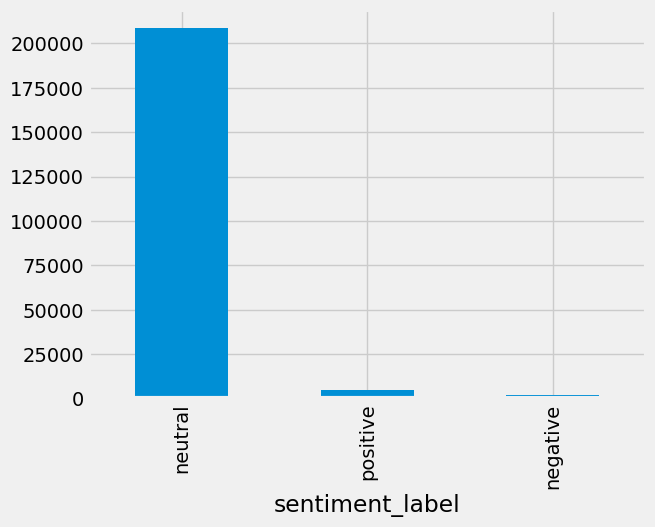

In [ ]:
df['sentiment_label'].value_counts().plot(kind='bar')

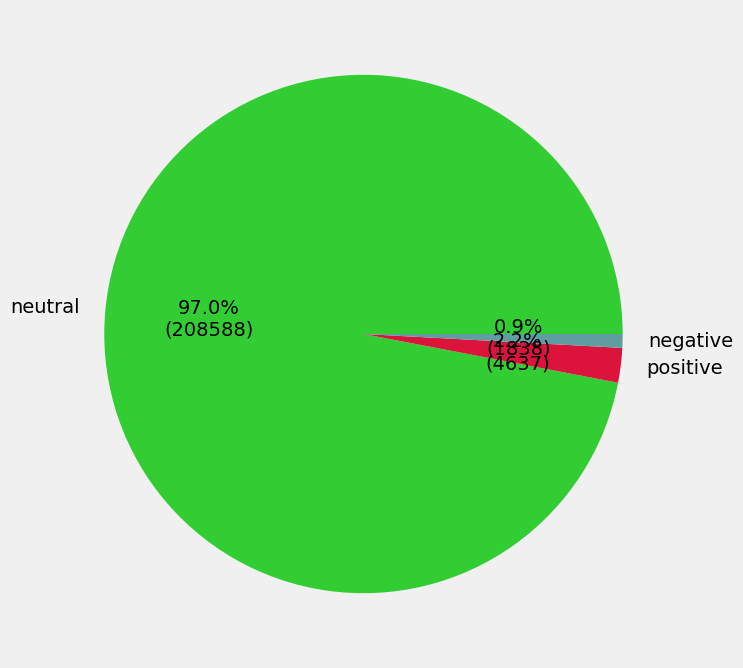

In [ ]:
plt.figure(figsize=(8,8))
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
colors = ['limegreen', 'crimson','cadetblue']
s = df['sentiment_label'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s), colors=colors)
plt.show()

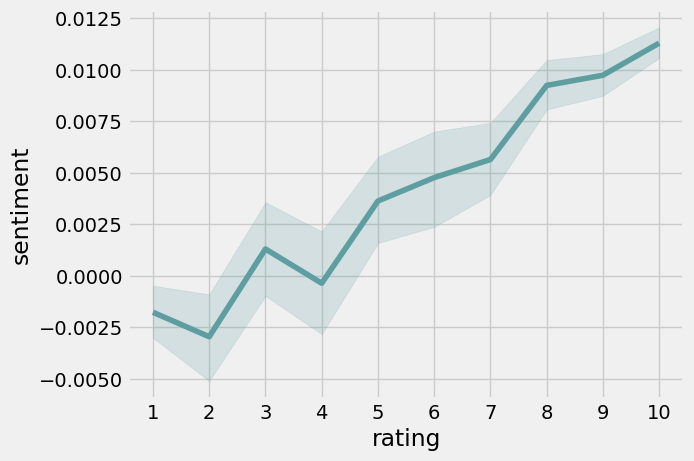

In [ ]:
#plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='rating', y='sentiment', color='cadetblue')
plt.xticks(range(1, 10+1, 1))
plt.show()

We see that higher rating tends

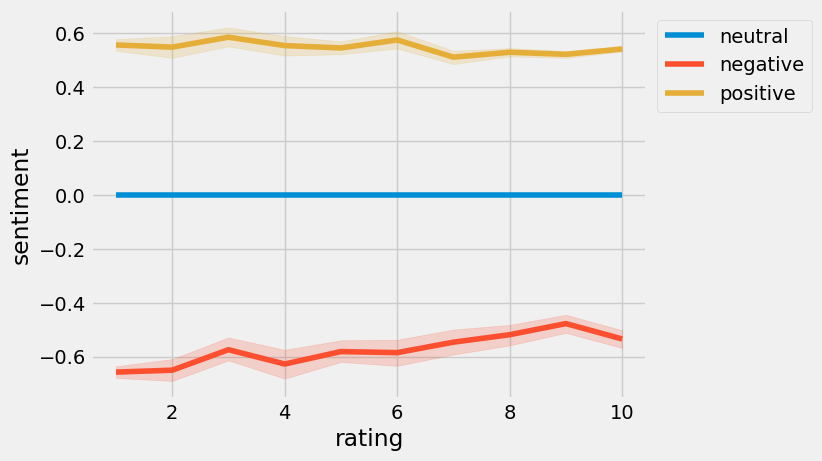

In [ ]:
# Correlation  btween rating and sentiment
sns.lineplot(data=df,x='rating',y='sentiment',hue='sentiment_label')

# Adjust legend position to the upper left corner (outside the plot)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

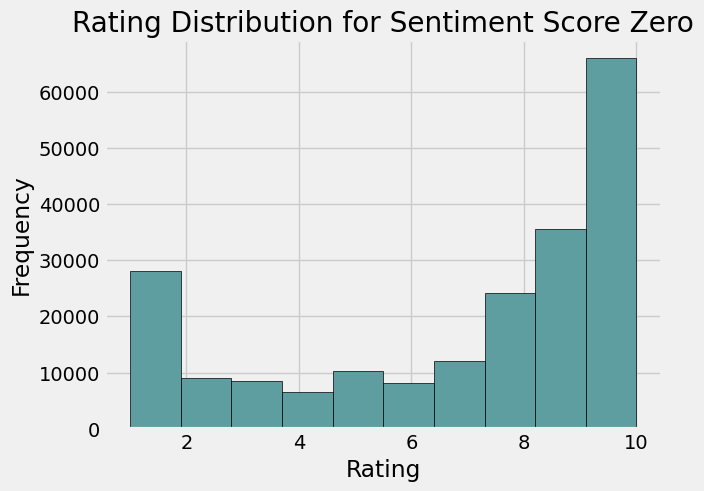

In [ ]:
#plt.figure(figsize=(12,8))
filtered_data = df[df['sentiment'] == 0]
plt.hist(filtered_data['rating'], bins=10, color='cadetblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Sentiment Score Zero')
plt.show()

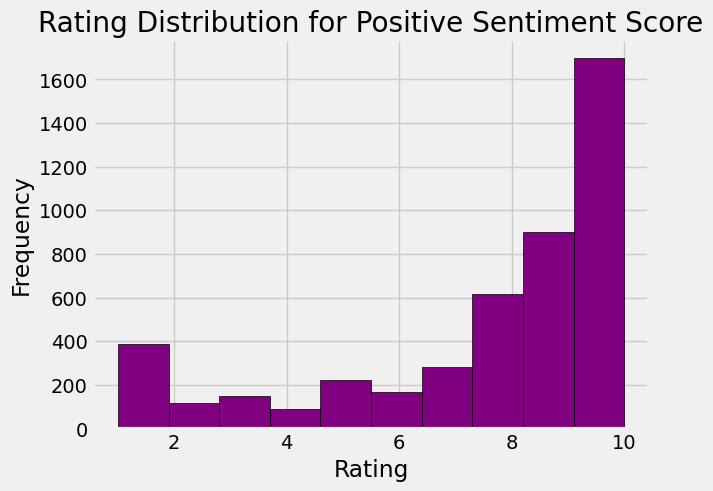

In [ ]:
#plt.figure(figsize=(12,8))
filtered_data = df[df['sentiment'] > 0]
plt.hist(filtered_data['rating'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Positive Sentiment Score')
plt.show()

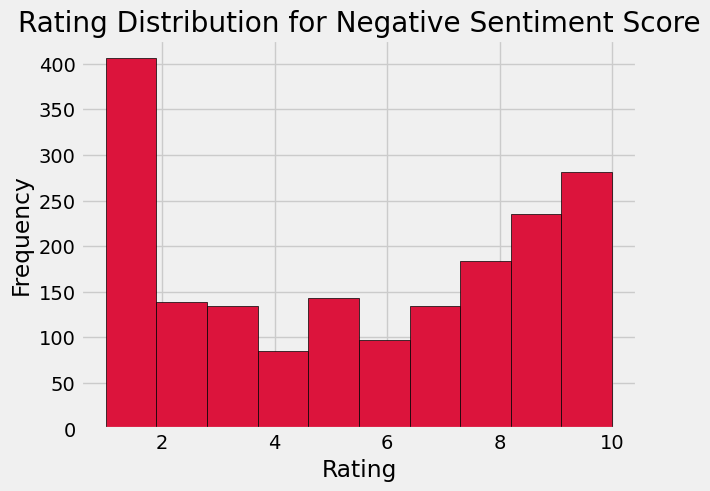

In [ ]:
#plt.figure(figsize=(12,8))
filtered_data = df[df['sentiment'] < 0]
plt.hist(filtered_data['rating'], bins=10, color='crimson',edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Negative Sentiment Score')
plt.show()

In [ ]:
df.head()

,drugName,condition,review,rating,date,usefulCount,sentiment,sentiment_label
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,0.0,neutral
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,0.0,neutral
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,0.0,neutral
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,0.0,neutral
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,0.0,neutral


In [ ]:
new_df = df[['drugName', 'condition', 'rating', 'usefulCount', 'sentiment']]

In [ ]:
new_df.head()

,drugName,condition,rating,usefulCount,sentiment
0,Valsartan,Left Ventricular Dysfunction,9,27,0.0
1,Guanfacine,ADHD,8,192,0.0
2,Lybrel,Birth Control,5,17,0.0
3,Ortho Evra,Birth Control,8,10,0.0
4,Buprenorphine / naloxone,Opiate Dependence,9,37,0.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     215063 non-null  object 
 1   condition    215063 non-null  object 
 2   rating       215063 non-null  int64  
 3   usefulCount  215063 non-null  int64  
 4   sentiment    215063 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.8+ MB


In [ ]:
new_df

,drugName,condition,rating,usefulCount,sentiment
0,Valsartan,Left Ventricular Dysfunction,9,27,0.0
1,Guanfacine,ADHD,8,192,0.0
2,Lybrel,Birth Control,5,17,0.0
3,Ortho Evra,Birth Control,8,10,0.0
4,Buprenorphine / naloxone,Opiate Dependence,9,37,0.0
...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",10,43,0.0
53762,Escitalopram,Anxiety,9,11,0.0
53763,Levonorgestrel,Birth Control,8,7,0.0
53764,Tapentadol,Pain,1,20,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_df = new_df[['rating', 'usefulCount', 'sentiment']]

scaled_df = scaler.fit_transform(numerical_df)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Remove the 'sparse' argument
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')  # You can use handle_unknown='ignore' to handle unseen values during prediction
drug_condition_encoded = one_hot_encoder.fit_transform(new_df[['drugName', 'condition']])
features = np.concatenate((drug_condition_encoded.toarray(), scaled_df), axis=1)  # Convert to dense array if necessary

In [ ]:
features

array([[ 0.        ,  0.        ,  0.        , ...,  0.61363567,
        -0.02754099, -0.06517863],
       [ 0.        ,  0.        ,  0.        , ...,  0.30834314,
         4.51216272, -0.06517863],
       [ 0.        ,  0.        ,  0.        , ..., -0.60753445,
        -0.30267455, -0.06517863],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.30834314,
        -0.5778081 , -0.06517863],
       [ 0.        ,  0.        ,  0.        , ..., -1.82870458,
        -0.22013448, -0.06517863],
       [ 0.        ,  0.        ,  0.        , ...,  0.61363567,
         0.49521277, -0.06517863]])

  0%|          | 0/18 [00:00<?, ?it/s]

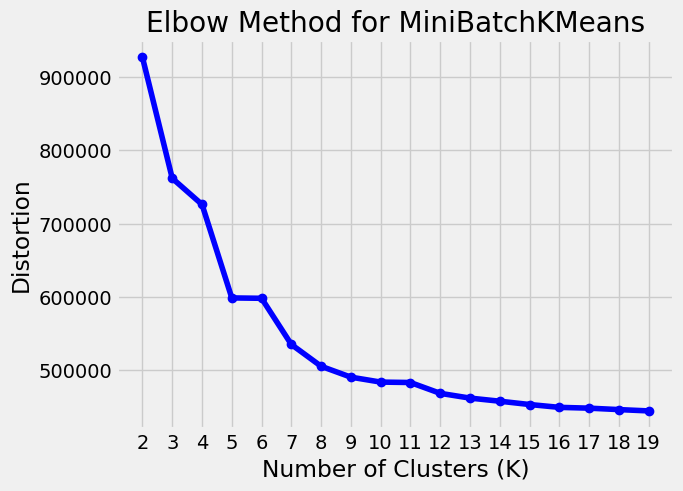

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
# Define the range of K values to try
k_values = range(2, 20)
distortions = []

# Iterate over different K values
for k in tqdm(k_values):
    mbkmeans = MiniBatchKMeans(n_clusters=k, batch_size=2048, random_state=42)
    mbkmeans.fit(features)
    distortions.append(mbkmeans.inertia_)

# Plot the distortions for different K values
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for MiniBatchKMeans')
plt.xticks(range(min(k_values), max(k_values) + 1, 1))
plt.show()

Best K value (Elbow Point): 8


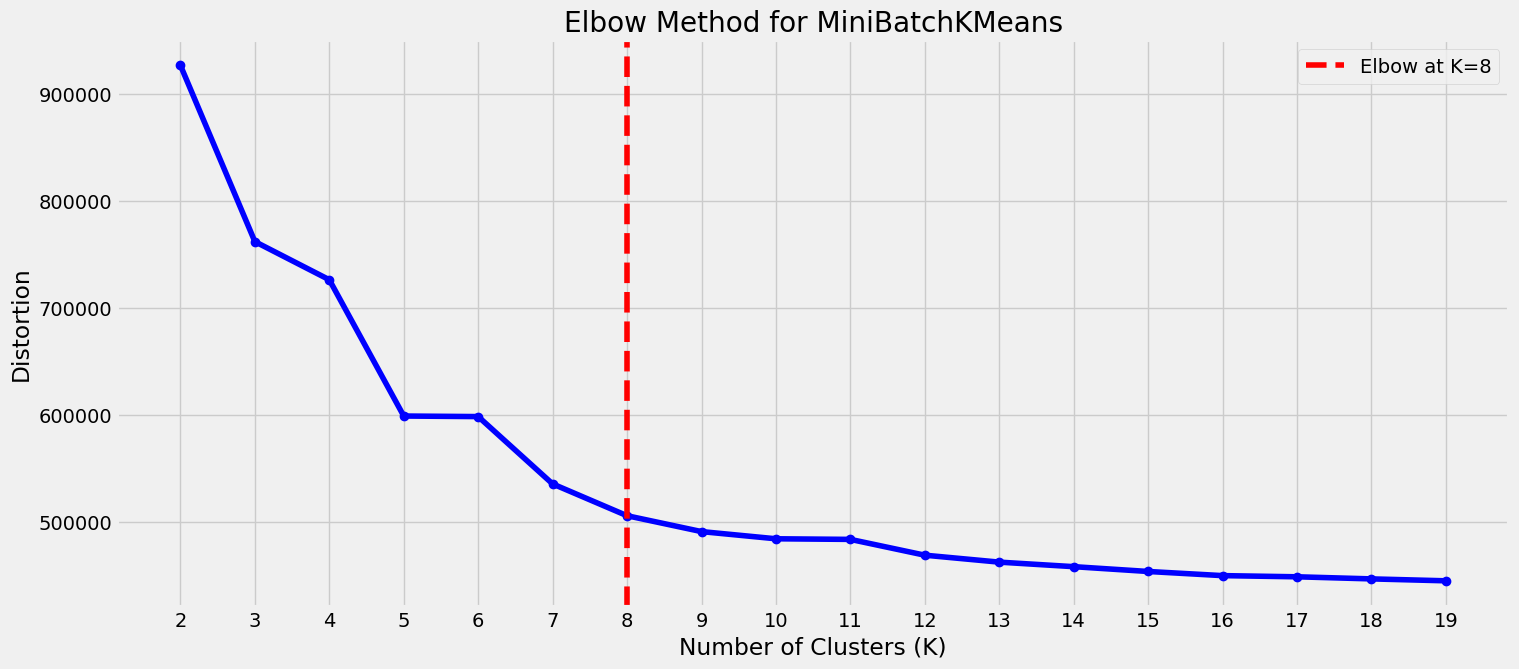

In [ ]:
!pip install kneed
from kneed import KneeLocator

# Find the elbow point
knee_locator = KneeLocator(k_values, distortions, curve="convex", direction="decreasing")
best_k = knee_locator.knee

print(f"Best K value (Elbow Point): {best_k}")

# Plot with the elbow point
plt.figure(figsize=(16, 7))
plt.plot(k_values, distortions, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method for MiniBatchKMeans')
plt.xticks(range(min(k_values), max(k_values) + 1, 1))

# Highlight the best K
if best_k:
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Elbow at K={best_k}')
    plt.legend()

plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.cluster import MiniBatchKMeans

k = 8  # Number of clusters
mbkmeans = MiniBatchKMeans(n_clusters=k, batch_size=2048)
mbkmeans.fit(features)

# Predict the clusters for each data point
cluster_labels = mbkmeans.predict(features)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
random_indices = np.random.choice(features.shape[0], 3000, replace=False)
random_data = features[random_indices]
random_labels = cluster_labels[random_indices]

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_data = tsne.fit_transform(random_data)

In [ ]:
#centroids_tsne = tsne.fit_transform(mbkmeans.cluster_centers_)

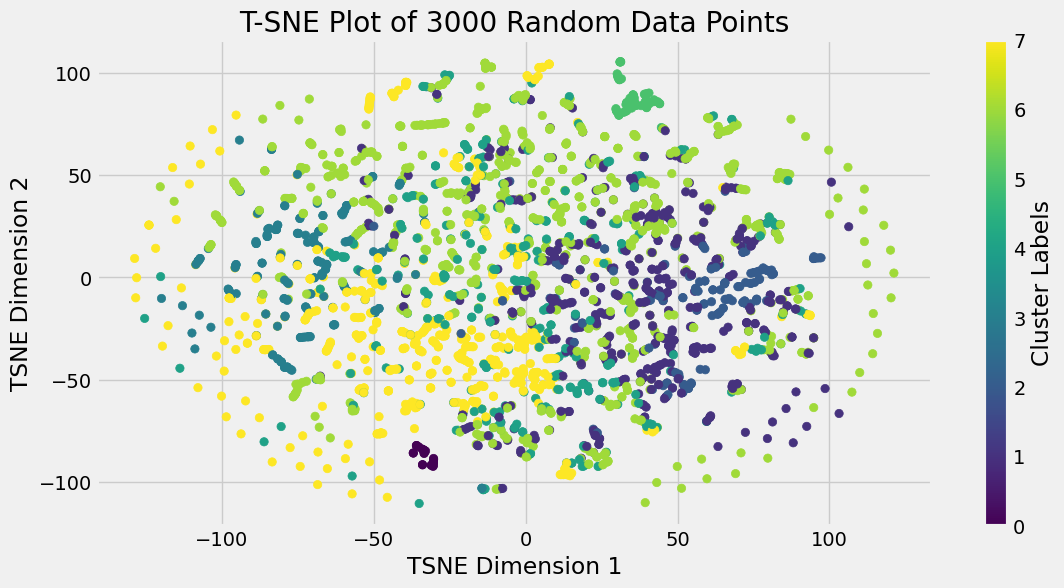

In [ ]:
plt.figure(figsize=(12, 6))
scatter=plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=random_labels)
#plt.scatter(centroids_tsne[:, 0], centroids_tsne[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title('T-SNE Plot of 3000 Random Data Points')
plt.colorbar(scatter, label="Cluster Labels")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(random_data)

In [ ]:
centroids_pca = pca.transform(mbkmeans.cluster_centers_)

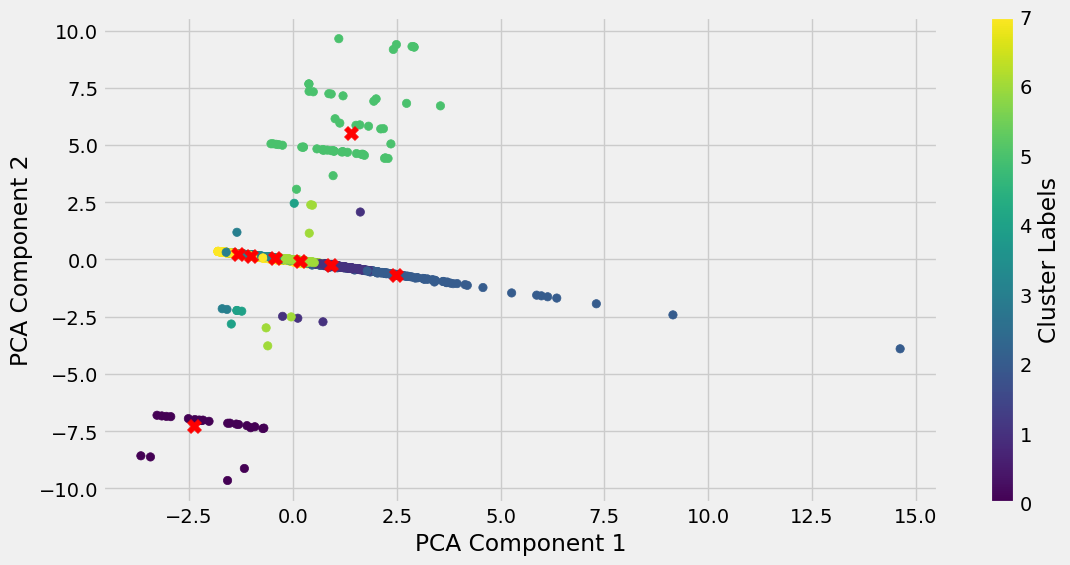

In [ ]:
plt.figure(figsize=(12, 6))
scatter=plt.scatter(pca_data[:, 0], pca_data[:, 1], c=random_labels)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
#plt.title('PCA plot of 3000 random Data points')
plt.colorbar(scatter, label="Cluster Labels")
plt.show()

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
import umap

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


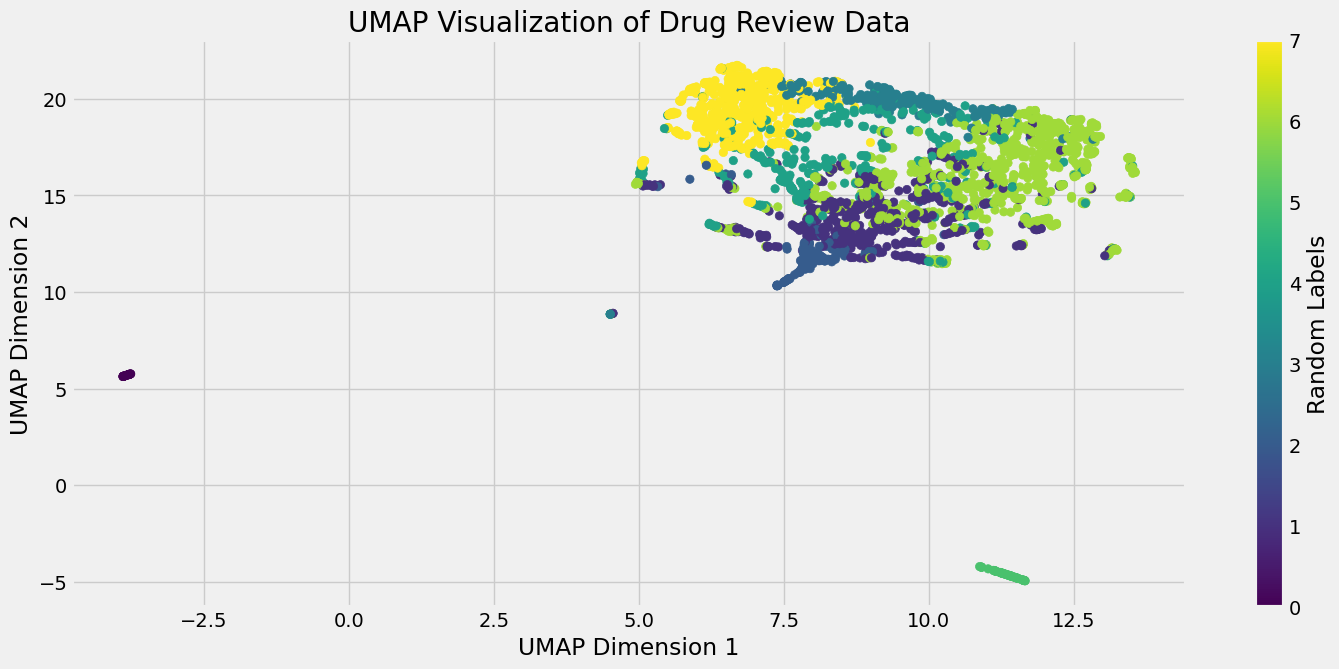

In [ ]:
import matplotlib.pyplot as plt

# Initialize UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the data (assuming 'preprocessed_data' is your dataset)
umap_data = umap_model.fit_transform(random_data)

# Scatter plot of UMAP results
plt.figure(figsize=(16, 7))
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=random_labels)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization of Drug Review Data')
plt.colorbar(label="Random Labels")
plt.show()